<img align="left" style="padding-left:10px;" width="100" src="images/HANSON.JPG.JPG">|
[Click here to visit my website](https://www.hansonkib.co.ke)
<img align="right" style="padding-right:10px;" width="100" src="images/HANSON.JPG.JPG">

# MODEL VALIDATION
* we can check the performance of the model by using the holdout set i.e holding some set of the training data and thereafter using this set to check the performance of the model

In [7]:
from sklearn.datasets import load_iris
iris=load_iris()
X=iris.data
y=iris.target

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#splitting the data with 50% from eaach set
X1,X2,y1,y2=train_test_split(X,y,random_state=0,train_size=0.5)
# fitting the model on the data
model=KNeighborsClassifier(n_neighbors=1)
model.fit(X1,y1)
# evaluating the model on the second set of data
y2_model=model.predict(X2)
accuracy_score(y2,y2_model)


0.9066666666666666

### model validation via cross validation
* one disadvantagee of using holdout set is tha we have lost some portion of the training set
* in the above case half of the data does not contribute in thee training of the dataset  and thiss may give a biased accuracy
* in cross validation each of the subset of the data is used in training and validation

In [11]:
y2_model=model.fit(X1,y1).predict(X2)
y1_model=model.fit(X2,y2).predict(X1)
accuracy_score(y1,y1_model),accuracy_score(y2,y2_model)the

(0.96, 0.9066666666666666)

* from the above code  we have two accuracy score and we may get the best by finding the mean  of the two
* also we can expand the cross validaation to use even more trials

In [48]:
from sklearn._validation import cross_val_score
cross_val_score(model, X, y, cv=5)

ModuleNotFoundError: No module named 'sklearn._validation'

In [49]:
from sklearn.cross_validation import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut(len(X)))
scores

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [50]:
scores.mean()

NameError: name 'scores' is not defined

# SELECTING THE BEST MODEL

### Validation curves in Scikit-Learn

Let's look at an example of using cross-validation to compute the validation curve for a class of models.
Here we will use a *polynomial regression* model: this is a generalized linear model in which the degree of the polynomial is a tunable parameter.
For example, a degree-1 polynomial fits a straight line to the data; for model parameters $a$ and $b$:

$$
y = ax + b
$$

A degree-3 polynomial fits a cubic curve to the data; for model parameters $a, b, c, d$:

$$
y = ax^3 + bx^2 + cx + d
$$

We can generalize this to any number of polynomial features.
In Scikit-Learn, we can implement this with a simple linear regression combined with the polynomial preprocessor.
We will use a *pipeline* to string these operations together.

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))


In [8]:
# creating some data that we will fit to our model
import numpy as np
def make_data(N, err=1.0, rseed=1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y=10-1./(X.ravel()+0.1)
    if err>0:
        y+=err * rng.rand(N)
    return X, y
X,y=make_data(40)

*we can now visualize our data together with polynomial fits of different degrees*

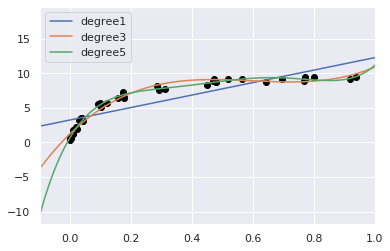

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn;seaborn.set()# plot formatting
X_test=np.linspace(-0.1,1.1,500)[:,None]
plt.scatter(X.ravel(),y,color="black")
axis=plt.axis
for degree in [1,3,5]:
    y_test=PolynomialRegression(degree).fit(X,y).predict(X_test)
    plt.plot(X_test.ravel(),y_test,label="degree{0}".format(degree))
plt.xlim(-0.1,1.0)
plt.ylim=(-2,12)
plt.legend(loc='best')
    

* the knob controlling the complexity of the model in the above case is the degree of the polynomial which can be any non-negative integer 
* A very useful question to answer here is what degree can provide the best trade-off between the bias(underfitting) and the variance(over fitting)
* we can do this by visualizing the validation curve of the data and the model.This can be done straightforwardly using ''validation_curve''

In [10]:
from sklearn.learning_curve import validation_curve
degree=np.arange(0,21)
train_score,val_score=validation_curve(PolynomialRegression(),X,y,
                                      'polynomialFeatures',degree,cv=7)


ModuleNotFoundError: No module named 'sklearn.learning_curve'